# GOAL MAP THEO HERNANDEZ

# Inspired by McKay Johns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import soccerdata as sd
import matplotlib.font_manager as font_manager
from PIL import Image
import matplotlib.image as mpimg

In [6]:
df = pd.read_csv('/Users/alfonsomarino/Desktop/shotmapTheo.csv')  #loading understat data

#Adjusts the coordinate scale as needed
df['X'] = df['X'] * 100 
df['Y'] = df['Y'] * 100

In [8]:
df.head()

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,year,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,320819,85,ShotOnPost,95.699997,65.500000,0.258628,Theo Hernández,h,2547,OpenPlay,2019,LeftFoot,13125,AC Milan,Inter,0,2,2019-09-21T18:45:00Z,Ante Rebic,Pass
1,323573,46,BlockedShot,81.500000,49.099998,0.047716,Theo Hernández,h,2547,OpenPlay,2019,LeftFoot,13143,AC Milan,Fiorentina,1,3,2019-09-29T18:45:00Z,NaN,BallRecovery
2,324462,50,Goal,98.699997,60.299999,0.067069,Theo Hernández,a,2547,SetPiece,2019,LeftFoot,13153,Genoa,AC Milan,1,2,2019-10-05T19:45:00Z,Lucas Paquetá,Pass
3,326614,77,SavedShot,86.500000,69.000000,0.046671,Theo Hernández,h,2547,OpenPlay,2019,LeftFoot,13163,AC Milan,Lecce,2,2,2019-10-20T19:45:00Z,Rade Krunic,Pass
4,328106,54,Goal,87.500000,48.500000,0.075379,Theo Hernández,a,2547,OpenPlay,2019,RightFoot,13176,Roma,AC Milan,2,1,2019-10-27T17:00:00Z,Davide Calabria,Cross


In [10]:
#With which foot does he score the most? (expression as a percentage of the total)

df[df['result'] == 'Goal']['shotType'].value_counts(1)

shotType
LeftFoot     0.862069
RightFoot    0.068966
Head         0.068966
Name: proportion, dtype: float64

In [11]:
# Calculate the stats we'll need to display
# 1. Total shots
# 2. Total goals
# 3. Total xG
# 4. xG per shot
# 5. Average distance of shots
# 6. Best assistman 
# 7. Fav foot

total_shots = df.shape[0] #numero righe => tot tiri
total_goals = df[df['result'] == 'Goal'].shape[0] #numero righe => tot gol
total_xG = df['xG'].sum() #somma xG
xG_per_shot = total_xG / total_shots
points_average_distance = df[df['result'] == 'Goal']['X'].mean()
actual_average_distance = 120 - (df[df['result'] == 'Goal']['X'] * 1.2).mean() #yards to metres

count_player_assisted = df[df['result'] == 'Goal']['player_assisted'].value_counts()
miglior_assist = count_player_assisted.idxmax().split()[-1]
numero_assist = count_player_assisted.max()

count_type = df[df['result'] == 'Goal']['shotType'].value_counts(1)
best_foot = count_type.idxmax().split()[-1]
prc_gol = round(count_type.max()*100,1)

print(points_average_distance, actual_average_distance)

90.61034472235318 11.267586333176183


In [12]:
# Setting the background color of the visualization 
background_color='blanchedalmond'

# Import the font you want to use or use the default ones
font_path = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
font_props = font_manager.FontProperties(fname=font_path)

In [13]:
#sets the characteristics of the field

pitch = VerticalPitch( 
    pitch_type = "opta", #opta dimension (https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitch_types.html)
    half = True, #displays only half of the field
    pitch_color = background_color, 
    pad_bottom = .5, 
    line_color = "white", 
    #linewidth = .75,
    line_alpha=0.8,
    axis = True, label = True
)

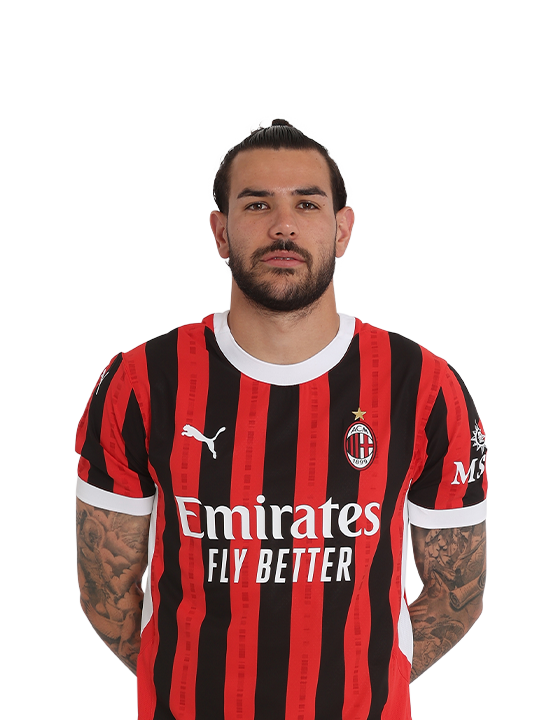

In [14]:
#import the image of the kicker

image_path = "/Users/alfonsomarino/Desktop/TheoHernandez-Large.png"
img = Image.open(image_path)
img

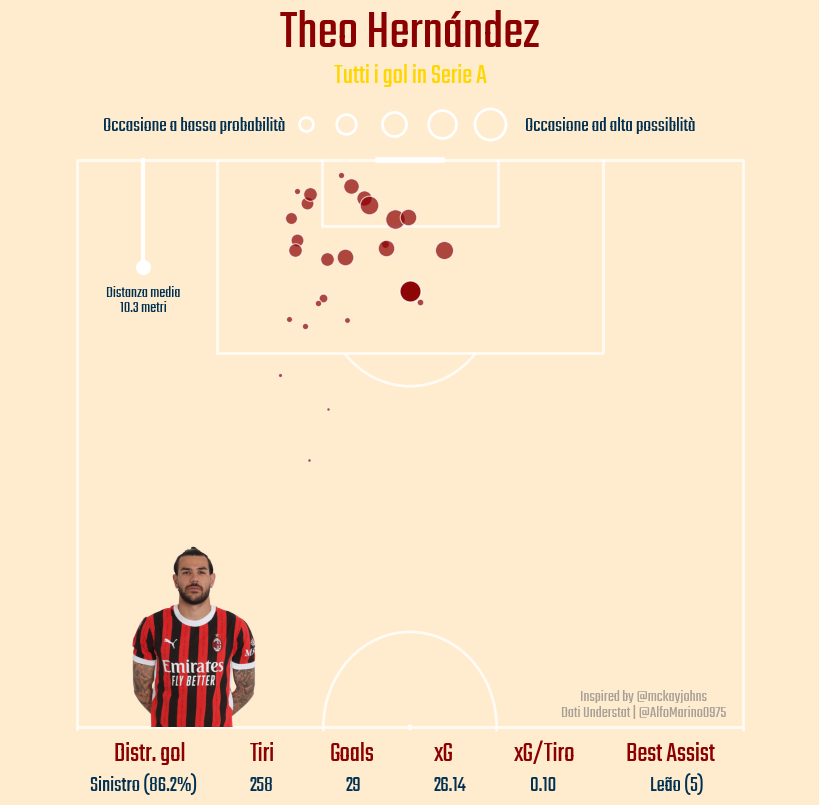

In [15]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)

# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.65, 1, .2])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5, 
    y=.85, 
    s='Theo Hernández', 
    fontsize=40, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='darkred', 
    ha='center'
)
ax1.text(
    x=0.5, 
    y=.7, 
    s=f'Tutti i gol in Serie A', 
    fontsize=20,
    fontweight='bold',
    fontproperties=font_props, 
    color='gold', 
    ha='center'
)
ax1.text(
    x=0.23, 
    y=0.5, 
    s=f'Occasione a bassa probabilità', 
    fontsize=15, 
    fontproperties=font_props, 
    color="#003153", 
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37, 
    y=0.53, 
    s=100, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.42, 
    y=0.53, 
    s=200, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.48, 
    y=0.53, 
    s=300, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.54, 
    y=0.53, 
    s=400, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)
ax1.scatter(
    x=0.6, 
    y=0.53, 
    s=500, 
    color=background_color, 
    edgecolor='white', 
    linewidth= 2
)

ax1.text(
    x=0.75, 
    y=0.5, 
    s=f'Occasione ad alta possiblità', 
    fontsize=15, 
    fontproperties=font_props, 
    color='#003153', 
    ha='center'
)


ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)

# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=90, 
    y=points_average_distance, 
    s=100, 
    color='white',  
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [90, 90], 
    [100, points_average_distance], 
    color='white', 
    linewidth=3
)

# Add a text label for the average distance
ax2.text(
    x=90, 
    y=points_average_distance - 4, 
    s=f'Distanza media\n{(actual_average_distance*0.9144):.1f} metri', 
    fontsize=12, 
    fontproperties=font_props, 
    color='#003153', 
    ha='center'
)

ax2.text(
    x=15,  # Posizione X per centrare il testo
    y=52,  # Posizione Y nel campo, puoi regolarla a tuo piacimento
    s='Inspired by @mckayjohns\nDati Understat | @AlfoMarino0975',
    fontsize=12,  # Dimensione del font
    fontproperties=font_props,  # Proprietà del font
    color='grey',  # Colore del testo
    ha='center',  # Allineamento orizzontale
    va='center',  # Allineamento verticale
    alpha=0.7  # Trasparenza del testo, puoi modificarla
)

# load image
img = mpimg.imread(image_path) 

img_height, img_width = img.shape[:2]

ax2.imshow(img, aspect='auto', extent=[95, 70, 50, 69], zorder=10)

for x in df.to_dict(orient='records'):
    if x['result'] == 'Goal':  
        pitch.scatter(
            x['X'], 
            x['Y'], 
            s=300 * x['xG'],  
            color='darkred', 
            ax=ax2,
            alpha=.7,
            linewidth=.8,
            edgecolor='white'
        )

ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.3, 
    y=.5, 
    s='Tiri', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

ax3.text(
    x=0.3, 
    y=0, 
    s=f'{total_shots}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#003153', 
    ha='left'
)

ax3.text(
    x=0.4, 
    y=.5, 
    s='Goals', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

ax3.text(
    x=0.42, 
    y=0, 
    s=f'{total_goals}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#003153', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=.5, 
    s='xG', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

ax3.text(
    x=0.53, 
    y=0, 
    s=f'{total_xG:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#003153', 
    ha='left'
)

ax3.text(
    x=0.63, 
    y=.5, 
    s='xG/Tiro', 
    fontsize=20, 
    fontproperties=font_props, 
    fontweight='bold', 
    color='darkred', 
    ha='left'
)

ax3.text(
    x=0.65, 
    y=0, 
    s=f'{xG_per_shot:.2f}', 
    fontsize=16, 
    fontproperties=font_props, 
    color='#003153', 
    ha='left'
)

ax3.text(
    x=0.77, 
    y=.5, 
    s= 'Best Assist',  # Mostra solo il cognome
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold', 
    color='darkred', 
    ha='left'
)
ax3.text(
    x=0.8, 
    y=0, 
    s=f'{miglior_assist} ({numero_assist})', 
    fontsize=16,
    fontproperties=font_props,
    color='#003153', 
    ha='left'
)

ax3.text(
    x=0.13, 
    y=.5, 
    s= 'Distr. gol',  # Mostra solo il cognome
    fontsize=20,
    fontproperties=font_props,
    fontweight='bold', 
    color='darkred', 
    ha='left'
)
ax3.text(
    x=0.1, 
    y=0, 
    s=f'Sinistro ({prc_gol}%)', 
    fontsize=16,
    fontproperties=font_props,
    color='#003153', 
    ha='left'
)


ax3.set_axis_off()

#output_path = "/Users/alfonsomarino/Desktop/theo_shot_plot.png"
#fig.savefig(output_path, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())